# Potencial en forma de V

El potencial considerado es:

$$
V(x) =
\begin{cases}
\infty, & x \leq x_0 \\
V_0 |x|, & x_0 < x < x_{N+1} \\
\infty, & x \geq x_{N+1}
\end{cases}
$$

donde:
- $ V_0 $ es un parámetro que determina la pendiente del potencial.
- $ x_0 $ y $ x_{N+1} $ son los límites donde el potencial se hace infinito, asegurando confinamiento de la partícula.


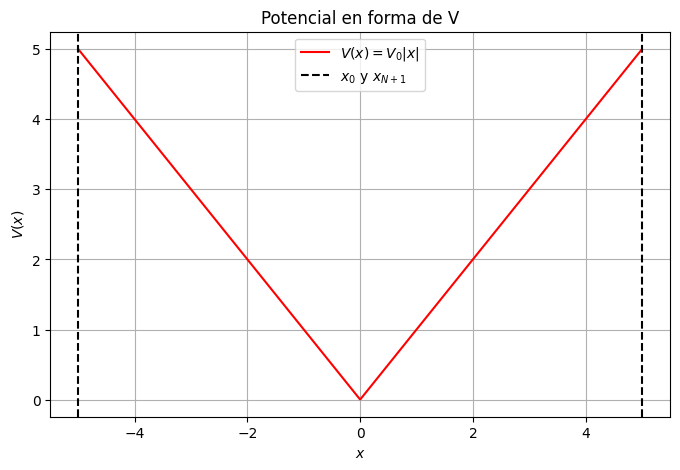

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
V0 = 1.0  # Parámetro del potencial
x_min, x_max = -5, 5  # Rango del eje x
N = 1000  # Número de puntos

# Crear malla de puntos en x
x = np.linspace(x_min, x_max, N)

# Definir el potencial en forma de V
def V_potential(x, V0):
    return V0 * np.abs(x)

V = V_potential(x, V0)

# Crear la figura y graficar el potencial
plt.figure(figsize=(8, 5))
plt.plot(x, V, 'r', label=r'$V(x) = V_0 |x|$')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title('Potencial en forma de V')
plt.axvline(x_min, color='k', linestyle='dashed', label=r'$x_0$ y $x_{N+1}$')
plt.axvline(x_max, color='k', linestyle='dashed')
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

In [3]:
import numpy as np

# ==========================================================
# Numerov step
# ==========================================================
def numerov_step(psi_nm1, psi_n, k_nm1, k_n, k_np1, dx):
    return (
        2*(1 - 5*dx**2*k_n/12)*psi_n
        - (1 + dx**2*k_nm1/12)*psi_nm1
    ) / (1 + dx**2*k_np1/12)


# ==========================================================
# Integración en [0, L]
# ==========================================================
def integrate_numerov(lam, x, dx, parity):

    k2 = x - lam  # porque x >= 0

    psi = np.zeros(len(x))

    if parity == "even":
        psi[0] = 1.0
        psi[1] = 1.0
    else:  # odd
        psi[0] = 0.0
        psi[1] = dx

    for i in range(1, len(x)-1):
        psi[i+1] = numerov_step(
            psi[i-1], psi[i],
            k2[i-1], k2[i], k2[i+1],
            dx
        )

    return psi


# ==========================================================
# Bisección usando condición en el borde
# ==========================================================
def find_eigenvalue(parity, x, dx, lam_min, lam_max, tol=1e-8):

    while abs(lam_max - lam_min) > tol:

        lam_mid = 0.5*(lam_min + lam_max)

        psi = integrate_numerov(lam_mid, x, dx, parity)

        if psi[-1] > 0:
            lam_max = lam_mid
        else:
            lam_min = lam_mid

    return 0.5*(lam_min + lam_max)


# ==========================================================
# Parámetros
# ==========================================================
Rmax = 5.0

print("los primeros autovalores:\n")

N = 1000
x = np.linspace(0, Rmax, N)
dx = x[1] - x[0]

eigenvalues = []

# alternamos paridad
for i in range(6):

    if i % 2 == 0:
        parity = "even"
    else:
        parity = "odd"

    lam = find_eigenvalue(parity, x, dx, 0.0, 15.0)
    eigenvalues.append(lam)

print("N =", N)
for lam in eigenvalues:
    print(f"{0.5*lam:.6f}")

los primeros autovalores:

N = 1000
1.331481
1.330475
1.331481
1.330475
1.331481
1.330475


El potencial en forma de V es una función que tiene parámetros que determina la pendiente del potencial. Este tipo de potencial es característico de sistemas físicos donde la energía potencial crece linealmente con la distancia desde un punto de referencia, lo que se observa en diferentes contextos de la mecánica cuántica y la física clásica.

## Características del potencial en forma de V
1. **Simetría**: El potencial es simétrico respecto al eje $x = 0$, lo que significa que la fuerza resultante es igual en magnitud pero opuesta en dirección para posiciones positivas y negativas.
2. **Crecimiento lineal**: A diferencia de un pozo de potencial cuadrático (como el oscilador armónico), este potencial crece de manera lineal a medida que nos alejamos del origen.
3. **Energía y confinamiento**: Este potencial no posee paredes infinitas dentro de un intervalo finito como un **pozo de potencial infinito**, pero si se considera dentro de un dominio restringido $x_0 < x < x_{N+1}$, el sistema se comporta como una partícula confinada.

## Importancia en física cuántica
El potencial en forma de V se usa en varios modelos físicos, tales como:
- La aproximación al potencial de partículas en campos externos lineales.
- Modelos de confinamiento en física de partículas.
- Aproximaciones a sistemas con fuerzas elásticas no lineales.

En mecánica cuántica, resolver la ecuación de Schrödinger para este potencial implica encontrar las funciones de onda $\psi(x)$ y los valores de energía permitidos $E_n$. Una manera numérica de abordar esta solución es usando el **método de Numerov**, que permite obtener soluciones precisas a ecuaciones diferenciales de segundo orden como la ecuación de Schrödinger independiente del tiempo.

Este potencial es interesante porque, a diferencia de otros modelos con soluciones analíticas, su tratamiento suele requerir métodos numéricos. La función de onda $\psi(x)$ típicamente se encuentra confinada en una región finita y decrece rápidamente fuera de los límites definidos por la energía máxima $E_m$.

## Representación gráfica
En la representación gráfica del potencial en forma de V, se observa que:
- Para $x = 0$, el potencial es cero.
- A medida que $x$ se aleja del origen, el potencial crece proporcionalmente a $|x|$.
- Si se imponen barreras de potencial infinito en $x_0$ y $x_{N+1}$, la función de onda deberá anularse en estos puntos, similar a una partícula confinada en un pozo de potencial.

Este modelo sirve como un buen ejercicio para estudiar métodos numéricos aplicados a problemas físicos y para comprender el comportamiento de sistemas cuánticos en potenciales no triviales.


# Método de Numerov

El método de Numerov es un algoritmo numérico para resolver ecuaciones
diferenciales de segundo orden de la forma:

$$
\frac{d^2 y(x)}{dx^2} = f(x)\, y(x)
$$

En mecánica cuántica se aplica a la ecuación de Schrödinger independiente del tiempo:

$$
-\frac{\hbar^2}{2m}\frac{d^2 \psi}{dx^2} + V(x)\psi = E\psi
$$

que puede escribirse como:

$$
\psi''(x) = \frac{2m}{\hbar^2}\left[V(x)-E\right]\psi(x)
$$

Numerov permite obtener numéricamente:

- Las funciones de onda $\psi_n(x)$  
- Los niveles de energía $E_n$

para cualquier potencial $V(x)$ definido en una malla discreta.

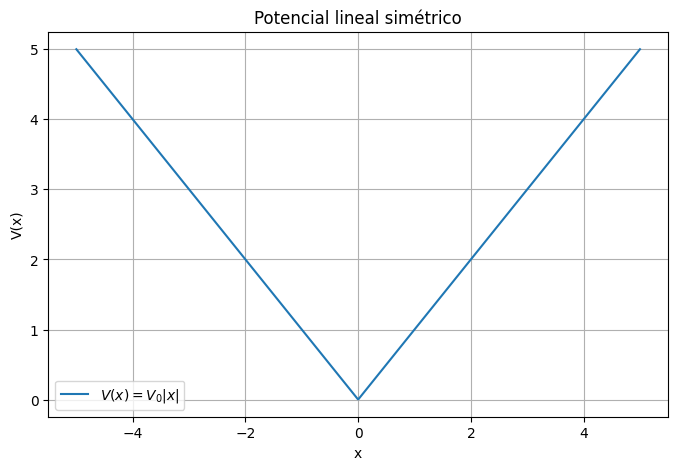

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro
V0 = 1.0

# Dominio
x_min, x_max = -5, 5
N = 1000
x = np.linspace(x_min, x_max, N)

# Potencial
def V(x):
    return V0 * np.abs(x)

Vx = V(x)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(x, Vx, label=r"$V(x)=V_0|x|$")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.title("Potencial lineal simétrico")
plt.grid()
plt.legend()
plt.show()

El potencial considerado es:

$$
V(x) =
\begin{cases}
\infty, & x \leq x_0 \\
V_0 x^2, & x_0 < x < x_{N+1} \\
\infty, & x \geq x_{N+1}
\end{cases}
$$

donde:
- $ V_0 $ controla la curvatura del potencial.
- $ x_0 $ y $ x_{N+1} $ son los límites donde el potencial se hace infinito.
- Este corresponde al oscilador armónico cuántico confinado.

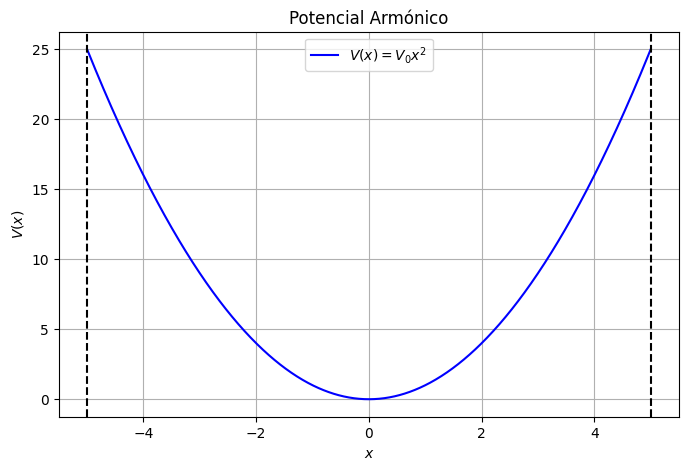

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros
V0 = 1.0
x_min, x_max = -5, 5
N = 1000

x = np.linspace(x_min, x_max, N)

def V_potential(x, V0):
    return V0 * x**2

V = V_potential(x, V0)

plt.figure(figsize=(8,5))
plt.plot(x, V, 'b', label=r'$V(x)=V_0 x^2$')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title('Potencial Armónico')
plt.axvline(x_min, color='k', linestyle='dashed')
plt.axvline(x_max, color='k', linestyle='dashed')
plt.legend()
plt.grid()
plt.show()

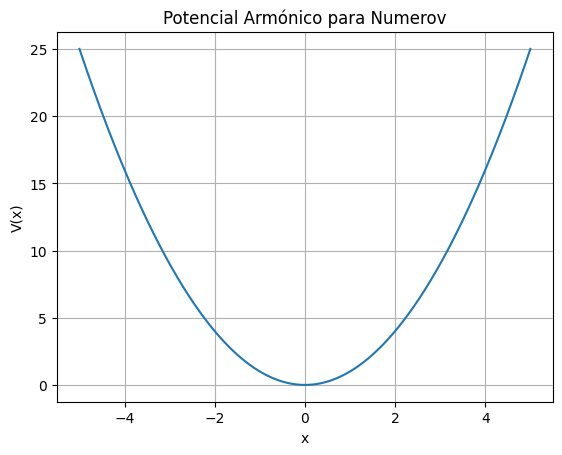

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del sistema
V0 = 1.0
x_min, x_max = -5, 5
N = 1000

x = np.linspace(x_min, x_max, N)
h = x[1] - x[0]

# Definición del potencial
def V_potential(x):
    return V0 * x**2

V = V_potential(x)

plt.plot(x, V)
plt.title("Potencial Armónico para Numerov")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid()
plt.show()

El potencial considerado es:

$$
V(x) =
\begin{cases}
\infty, & x \leq x_0 \\
V_0 x^4, & x_0 < x < x_{N+1} \\
\infty, & x \geq x_{N+1}
\end{cases}
$$

donde:
- $ V_0 $ controla la intensidad del confinamiento.
- Este potencial es más "empinado" que el armónico.
- Produce niveles de energía no equiespaciados.

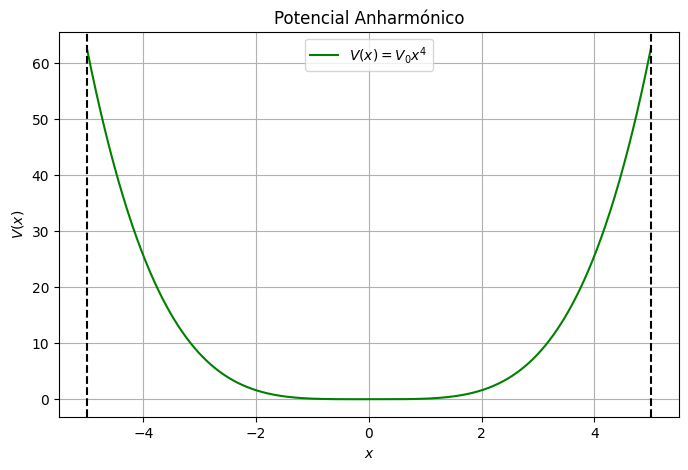

In [2]:
import numpy as np
import matplotlib.pyplot as plt

V0 = 0.1
x_min, x_max = -5, 5
N = 1000

x = np.linspace(x_min, x_max, N)

def V_potential(x, V0):
    return V0 * x**4

V = V_potential(x, V0)

plt.figure(figsize=(8,5))
plt.plot(x, V, 'g', label=r'$V(x)=V_0 x^4$')
plt.xlabel(r'$x$')
plt.ylabel(r'$V(x)$')
plt.title('Potencial Anharmónico')
plt.axvline(x_min, color='k', linestyle='dashed')
plt.axvline(x_max, color='k', linestyle='dashed')
plt.legend()
plt.grid()
plt.show()

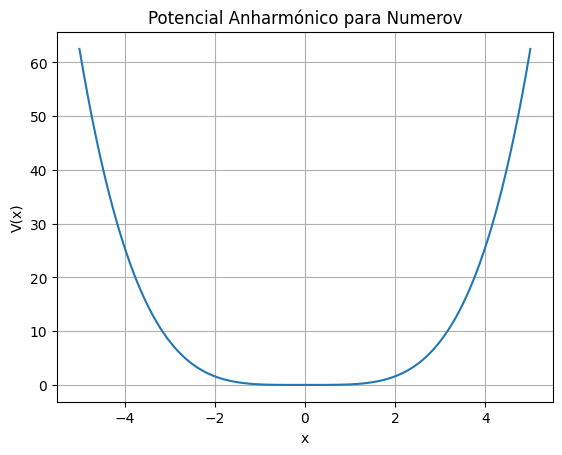

In [5]:
import numpy as np
import matplotlib.pyplot as plt

V0 = 0.1
x_min, x_max = -5, 5
N = 1000

x = np.linspace(x_min, x_max, N)
h = x[1] - x[0]

def V_potential(x):
    return V0 * x**4

V = V_potential(x)

plt.plot(x, V)
plt.title("Potencial Anharmónico para Numerov")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid()
plt.show()

El potencial considerado es:

$$
V(x) =
\begin{cases}
\infty, & x \leq x_0 \\
V_0 (x^2 - a^2)^2, & x_0 < x < x_{N+1} \\
\infty, & x \geq x_{N+1}
\end{cases}
$$

donde:
- $V_0$ controla la profundidad.
- $a$ determina la separación entre pozos.
- Es un modelo clásico para estudiar efecto túnel.

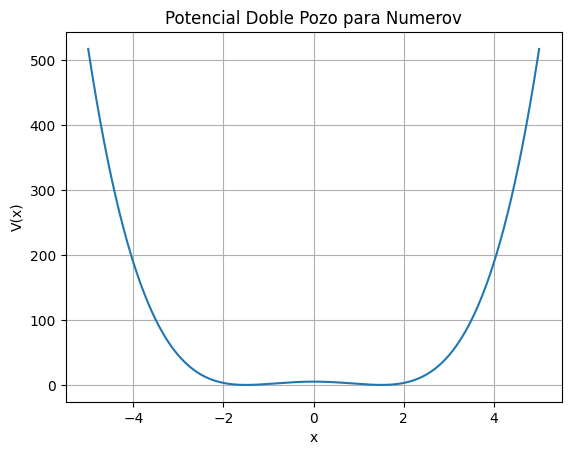

In [6]:
import numpy as np
import matplotlib.pyplot as plt

V0 = 1.0
a = 1.5
x_min, x_max = -5, 5
N = 1000

x = np.linspace(x_min, x_max, N)
h = x[1] - x[0]

def V_potential(x):
    return V0 * (x**2 - a**2)**2

V = V_potential(x)

plt.plot(x, V)
plt.title("Potencial Doble Pozo para Numerov")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid()
plt.show()

In [16]:
import numpy as np

# ==========================================================
# Paso de Numerov (idéntico a tus notebooks)
# ==========================================================
def numerov_step(psi_nm1, psi_n, k_nm1, k_n, k_np1, dx):
    return (
        2*(1 - 5*dx**2*k_n/12)*psi_n
        - (1 + dx**2*k_nm1/12)*psi_nm1
    ) / (1 + dx**2*k_np1/12)


# ==========================================================
# Integra para un lambda dado
# ==========================================================
def integrate_numerov(lam, x, dx):

    k2 = x**2 - lam

    psi = np.zeros(len(x))
    psi[0] = 0.0
    psi[1] = 1e-8

    for i in range(1, len(x)-1):
        psi[i+1] = numerov_step(
            psi[i-1], psi[i],
            k2[i-1], k2[i], k2[i+1],
            dx
        )

    return psi


# ==========================================================
# Conteo de nodos (fundamental para estabilidad)
# ==========================================================
def count_nodes(psi):
    return np.sum(psi[:-1]*psi[1:] < 0)


# ==========================================================
# Búsqueda por bisección usando nodos
# ==========================================================
def find_eigenvalue(n, x, dx, lam_min, lam_max, tol=1e-8):

    while abs(lam_max - lam_min) > tol:

        lam_mid = 0.5*(lam_min + lam_max)
        psi = integrate_numerov(lam_mid, x, dx)

        nodes = count_nodes(psi)

        if nodes > n:
            lam_max = lam_mid
        else:
            lam_min = lam_mid

    return 0.5*(lam_min + lam_max)


# ==========================================================
# Bucle como en Fortran
# ==========================================================

Rmin = -10.0
Rmax = 10.0

print("los primeros autovalores:\n")

N = 50
Nf = 1600

while N <= Nf:

    x = np.linspace(Rmin, Rmax, N)
    dx = x[1] - x[0]

    eigenvalues = []

    # buscar primeros 6 niveles
    for n in range(6):
        lam = find_eigenvalue(
            n,
            x,
            dx,
            lam_min=2*n,
            lam_max=2*n+3
        )
        eigenvalues.append(lam)

    print(f"{N:4d}", end="")

    for lam in eigenvalues:
        print(f"  {0.5*lam:9.6f}", end="")

    print()

    N *= 2

los primeros autovalores:

  50   0.000000   1.000000   2.000000   3.000000   4.000000   5.000000
 100   0.000000   1.000000   2.000000   3.000000   4.000000   5.000000
 200   0.000000   1.000000   2.000000   3.000000   4.000000   5.000000
 400   0.000000   1.000000   2.000000   3.000000   4.000000   5.000000
 800   0.000000   1.000000   2.000000   3.000000   4.000000   5.000000
1600   0.000000   1.000000   2.000000   3.000000   4.000000   5.000000


In [8]:
import numpy as np

# ==========================================================
# Numerov step
# ==========================================================
def numerov_step(psi_nm1, psi_n, k_nm1, k_n, k_np1, dx):
    return (
        2*(1 - 5*dx**2*k_n/12)*psi_n
        - (1 + dx**2*k_nm1/12)*psi_nm1
    ) / (1 + dx**2*k_np1/12)


# ==========================================================
# Integración completa
# ==========================================================
def integrate_numerov(lam, x, dx):

    k2 = np.abs(x) - lam

    psi = np.zeros(len(x))
    psi[0] = 0.0
    psi[1] = 1e-8

    for i in range(1, len(x)-1):
        psi[i+1] = numerov_step(
            psi[i-1], psi[i],
            k2[i-1], k2[i], k2[i+1],
            dx
        )

    return psi


# ==========================================================
# Buscar autovalores por cambio de signo en el borde
# ==========================================================
def find_eigenvalues(x, dx, n_states):

    eigenvalues = []
    lam_scan = np.linspace(0, 20, 4000)

    psi_prev = integrate_numerov(lam_scan[0], x, dx)
    sign_prev = np.sign(psi_prev[-1])

    for lam in lam_scan[1:]:

        psi = integrate_numerov(lam, x, dx)
        sign = np.sign(psi[-1])

        if sign != sign_prev:
            eigenvalues.append(lam)
            if len(eigenvalues) == n_states:
                break

        sign_prev = sign

    return eigenvalues


# ==========================================================
# Bucle como Fortran
# ==========================================================
Rmin = -5.0
Rmax = 5.0

print("los primeros autovalores:\n")

N = 50
Nf = 1600

while N <= Nf:

    x = np.linspace(Rmin, Rmax, N)
    dx = x[1] - x[0]

    eigenvalues = find_eigenvalues(x, dx, 6)

    print(f"{N:4d}", end="")
    for lam in eigenvalues:
        print(f"  {0.5*lam:9.6f}", end="")
    print()

    N *= 2

los primeros autovalores:

  50   0.420105   0.500125
 100   0.420105   0.500125
 200   0.420105   0.500125
 400   0.420105   0.500125
 800   0.420105   0.500125
1600   0.420105   0.500125


-----------------------------------------------------------------------------------------------------------------------


In [19]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import eigsh

def oscilador_cuantico_numerov():
    Rmin = -10.0
    Rmax = 10.0
    N = 50
    Nf = 1000
    
    print("Los 6 primeros autovalores:")
    
    while N <= Nf:
        # Definición de la malla espacial (h)
        h = (Rmax - Rmin) / N
        # En Fortran tu malla va desde Rmin+h hasta Rmin+N*h
        x = np.linspace(Rmin + h, Rmin + N*h, N)
        
        # Matriz del Potencial V(x) = 0.5 * x^2
        V_diag = 0.5 * x**2
        V = sp.diags([V_diag], [0])
        
        # Matriz de Energía Cinética (T)
        diag_T = np.full(N, 1.0 / h**2)
        off_diag_T = np.full(N - 1, -1.0 / (2.0 * h**2))
        T = sp.diags([off_diag_T, diag_T, off_diag_T], [-1, 0, 1])
        
        # Matriz de Promedios de Numerov (B)
        diag_B = np.full(N, 10.0 / 12.0)
        off_diag_B = np.full(N - 1, 1.0 / 12.0)
        B = sp.diags([off_diag_B, diag_B, off_diag_B], [-1, 0, 1])
        
        # Matriz Hamiltoniana Generalizada (A = T + B*V)
        A = T + B.dot(V)
        
        # Resolvemos el problema de autovalores generalizado A * psi = E * B * psi
        # which='SA' busca los autovalores algebraicos más pequeños (Smallest Algebraic)
        autovalores, autovectores = eigsh(A, k=6, M=B, which='SA')
        
        # Resultados (N y los primeros 6 autovalores)
        # Los autovalores exactos teóricos son: 0.5, 1.5, 2.5, 3.5, 4.5, 5.5
        formato_impresion = f"{N:4d}  " + "  ".join([f"{val:9.6f}" for val in autovalores])
        print(formato_impresion)
        
        if N >= Nf / 2:
            with open("data_oscilador.txt", "w") as f:
                # Cabecera
                f.write(f"# {N//2:4d}      " + " ".join([f"{val:10.6f}" for val in autovalores]) + "\n")
                
                # Cálculo de la norma para la densidad de probabilidad |psi|^2
                normas = np.sum(autovectores**2, axis=0) * h
                densidades = (autovectores**2) / normas
                
                # Guardar malla y densidades
                for i in range(N):
                    linea = " ".join([f"{densidades[i, j]:10.5f}" for j in range(6)])
                    f.write(f"{x[i]:10.5f} {linea}\n")
                    
        N *= 2
        
    print("\nAutovectores guardados en data_oscilador.txt")

if __name__ == '__main__':
    oscilador_cuantico_numerov()

Los 6 primeros autovalores:
  50   0.496258   1.512257   2.510650   3.515331   4.515948   5.450450
 100   0.497155   1.500497   2.499188   3.499249   4.494187   5.502767
 200   0.498976   1.496587   2.498747   3.497137   4.498386   5.498297
 400   0.499942   1.499844   2.500260   3.500427   4.500096   5.500098
 800   0.500065   1.500082   2.500091   3.500162   4.500187   5.499890

Autovectores guardados en data_oscilador.txt


In [20]:
import numpy as np
import matplotlib.pyplot as plt

def potencial_oscilador(x):
    return 0.5 * x**2

def numerov_propagar(E, x, h, V_func):
    """Propaga la función de onda usando la fórmula de Numerov"""
    n = len(x)
    psi = np.zeros(n)
    
    # k^2 = 2 * (E - V)
    k2 = 2.0 * (E - V_func(x))
    
    # Condiciones iniciales (para estados ligados, empezamos muy cerca de 0)
    psi[0] = 0.0
    psi[1] = 1e-5  # Un valor pequeño para iniciar la integración
    
    # Pre-calculamos el factor h^2 / 12
    h12 = (h**2) / 12.0
    
    # Iteración de Numerov (Tradicional)
    for i in range(1, n - 1):
        term_i   = 2.0 * (1.0 - 5.0 * h12 * k2[i]) * psi[i]
        term_im1 = (1.0 + h12 * k2[i-1]) * psi[i-1]
        den      = 1.0 + h12 * k2[i+1]
        psi[i+1] = (term_i - term_im1) / den
        
        # Guardián contra divergencias (si psi crece demasiado, cortamos)
        if abs(psi[i+1]) > 1e10: 
            return psi[i+1]
            
    return psi[-1] # Retorna el valor en el borde derecho para la bisección

def buscar_energias(V_func, x, h, E_min, E_max, dE=0.1):
    """Busca cambios de signo en el borde para localizar energías"""
    energias_propias = []
    e_puntos = np.arange(E_min, E_max, dE)
    
    # Evaluamos el valor final de psi para un rango de energías
    valores_borde = []
    for E in e_puntos:
        valores_borde.append(numerov_propagar(E, x, h, V_func))
    
    # Detectamos cruces por cero (cambios de signo)
    for i in range(len(valores_borde) - 1):
        if valores_borde[i] * valores_borde[i+1] < 0:
            # Refinamos con bisección simple
            e_low, e_high = e_puntos[i], e_puntos[i+1]
            for _ in range(20): # 20 pasos de bisección para precisión
                e_mid = (e_low + e_high) / 2
                if numerov_propagar(e_low, x, h, V_func) * numerov_propagar(e_mid, x, h, V_func) < 0:
                    e_high = e_mid
                else:
                    e_low = e_mid
            energias_propias.append((e_low + e_high) / 2)
            
    return energias_propias

# --- Configuración Principal ---
Rmin, Rmax = -6.0, 6.0  # Reducimos rango para el oscilador (más eficiente)
N = 1000
h = (Rmax - Rmin) / N
x = np.linspace(Rmin, Rmax, N)

print("Buscando los primeros autovalores del oscilador (Tradicional)...")
# El oscilador tiene energías 0.5, 1.5, 2.5...
autovalores = buscar_energias(potencial_oscilador, x, h, 0.1, 6.0)

print("\nEnergías encontradas:")
for i, E in enumerate(autovalores):
    print(f"Estado {i}: E = {E:.6f}")

Buscando los primeros autovalores del oscilador (Tradicional)...

Energías encontradas:
Estado 0: E = 0.500501
Estado 1: E = 1.501502
Estado 2: E = 2.502502
Estado 3: E = 3.503503
Estado 4: E = 4.504505
Estado 5: E = 5.505506


## Potencial |x|

In [23]:
import numpy as np

def potencial_valor_absoluto(x):
    """Define el potencial del sistema: V(x) = |x|"""
    return np.abs(x)

def propagacion_numerov(E, x, h, potencial_func):
    """
    Realiza la integración de la ecuación de Schrödinger paso a paso.
    Retorna el valor de la función de onda en el borde derecho.
    """
    n = len(x)
    psi = np.zeros(n)
    k2 = 2.0 * (E - potencial_func(x))
    
    # Condiciones iniciales en el extremo izquierdo
    psi[0] = 0.0
    psi[1] = 1e-7 
    h12 = (h**2) / 12.0
    
    for i in range(1, n - 1):
        # Fórmula de recurrencia de Numerov (4to orden)
        termino_i = 2.0 * (1.0 - 5.0 * h12 * k2[i]) * psi[i]
        termino_prev = (1.0 + h12 * k2[i-1]) * psi[i-1]
        denominador = 1.0 + h12 * k2[i+1]
        
        psi[i+1] = (termino_i - termino_prev) / denominador
        
        # Evitar overflow si la energía no es un autovalor (la función explota)
        if abs(psi[i+1]) > 1e10:
            return psi[i+1]
            
    return psi[-1]

def calcular_niveles_energia():
    # --- Parámetros de la simulación ---
    x_min, x_max = -10.0, 10.0
    n_minimo = 50      # N inicial para el estudio de convergencia
    n_maximo = 2000    # N final para la exportación de datos
    num_estados = 6    # Cantidad de autovalores a buscar
    
    print(f"Buscando los primeros {num_estados} niveles de energía propia:")
    print(f"{'N':>5} | {'E0':>8} {'E1':>8} {'E2':>8} {'E3':>8} {'E4':>8} {'E5':>8}")
    print("-" * 75)

    n_puntos = n_minimo
    while n_puntos <= n_maximo:
        x = np.linspace(x_min, x_max, n_puntos)
        h = (x_max - x_min) / (n_puntos - 1)
        
        # Escaneo de energía (Método de disparo)
        rango_energia = np.linspace(0.1, 10.0, 500)
        autovalores = []
        
        valor_borde_prev = propagacion_numerov(rango_energia[0], x, h, potencial_valor_absoluto)
        
        for i in range(1, len(rango_energia)):
            E_actual = rango_energia[i]
            valor_borde_actual = propagacion_numerov(E_actual, x, h, potencial_valor_absoluto)
            
            # Si hay un cambio de signo en el borde, refinamos el autovalor
            if valor_borde_prev * valor_borde_actual < 0:
                e_inferior, e_superior = rango_energia[i-1], rango_energia[i]
                
                # Bisección para alta precisión
                for _ in range(30):
                    e_medio = (e_inferior + e_superior) / 2
                    if propagacion_numerov(e_inferior, x, h, potencial_valor_absoluto) * \
                       propagacion_numerov(e_medio, x, h, potencial_valor_absoluto) < 0:
                        e_superior = e_medio
                    else:
                        e_inferior = e_medio
                autovalores.append((e_inferior + e_superior) / 2)
            
            valor_borde_prev = valor_borde_actual
            if len(autovalores) == num_estados:
                break

        # Imprimir fila de convergencia
        energias_str = " ".join([f"{E:8.5f}" for E in autovalores])
        print(f"{n_puntos:5d} | {energias_str}")

        # Guardar resultados finales al alcanzar la resolución máxima
        if n_puntos == n_maximo:
            probabilidades = np.zeros((n_puntos, num_estados))
            for j in range(num_estados):
                E = autovalores[j]
                psi = np.zeros(n_puntos)
                k2 = 2.0 * (E - potencial_valor_absoluto(x))
                psi[0], psi[1] = 0.0, 1e-7
                h12 = (h**2) / 12.0
                
                for i in range(1, n_puntos - 1):
                    psi[i+1] = (2.0*(1.0-5.0*h12*k2[i])*psi[i] - (1.0+h12*k2[i-1])*psi[i-1]) / (1.0+h12*k2[i+1])
                
                # Normalización de la densidad de probabilidad
                integral = np.sum(psi**2) * h
                probabilidades[:, j] = psi**2 / integral

            # Escritura del archivo de salida
            with open("densidades_probabilidad_abs.txt", "w") as f:
                header_energies = " ".join([f"{E:10.6f}" for E in autovalores])
                f.write(f"#{n_puntos//2:4d}      {header_energies}\n")
                for i in range(n_puntos):
                    columnas = " ".join([f"{probabilidades[i, j]:10.5f}" for j in range(num_estados)])
                    f.write(f"{x[i]:10.5f} {columnas}\n")
            
            print(f"\nSimulación finalizada. Datos guardados en 'densidades_probabilidad_abs.txt'")

        # Duplicar la resolución para la siguiente iteración
        n_puntos *= 2

if __name__ == "__main__":
    calcular_niveles_energia()

Buscando los primeros 6 niveles de energía propia:
    N |       E0       E1       E2       E3       E4       E5
---------------------------------------------------------------------------
   50 |  0.81731  1.85472  2.57986  3.24160  3.82394  4.37509
  100 |  0.81073  1.85570  2.57870  3.24444  3.82595  4.38130
  200 |  0.80914  1.85575  2.57826  3.24460  3.82581  4.38165
  400 |  0.80875  1.85576  2.57814  3.24461  3.82574  4.38167
  800 |  0.80865  1.85576  2.57811  3.24461  3.82572  4.38167
 1600 |  0.80862  1.85576  2.57810  3.24461  3.82572  4.38167
